In [1]:
import pandas as pd
import os

In [2]:
from datetime import datetime

def getTimestamp():
    dateTimeObj = datetime.now()

    # Converting datetime object to string
    dateTimeObj = datetime.now()
    timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S.%f)")

    #print('Timestamp : ', timestampStr)
    return timestampStr

# Configuration

In [3]:
# div id='ctl00_ctl00_ctl00_BodyRegion_BodyRegion_BodyRegion_content'

# Configuration
file_location = '../examples'

annual_cfg_year = '2023'
annual_cfg_date = ['0131']

#annual_cfg_year = '2022'
#annual_cfg_date = ['0131','0228','0331','0430','0531','0630','0731','0831','0930','1031','1130','1231']

portfolio_name_cfg = ['FRC1CS','FRC2TD','FRC3IB']
portfolio_summary_name = 'Stocks.xls'
portfolio_performance_name = 'Performance.html'

benchmark_name_cfg = 'FRCBM'
benchmark_1 = 'SPDRÂ® S&P 500 ETF Trust'
benchmark_1_tiker = 'SPY'
benchmark_2 = 'WisdomTree Cloud Computing ETF'
benchmark_2_tiker = 'WCLD' 

# Parse Configuration
annual_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
current_month_i = len(annual_cfg_date) - 1

# Portfolio ID
current_portfolio_i = 0

summary_format = {
    'Month': '{:,.2%}'.format,
    'YTD': '{:,.2%}'.format,
    benchmark_1_tiker: '{:,.2%}'.format,
    benchmark_1_tiker+' YTD': '{:,.2%}'.format,
    'vs '+benchmark_1_tiker: '{:,.2%}'.format,
    'vs '+benchmark_1_tiker+' YTD': '{:,.2%}'.format,
    benchmark_2_tiker: '{:,.2%}'.format,
    benchmark_2_tiker+' YTD': '{:,.2%}'.format,
    'vs '+benchmark_2_tiker: '{:,.2%}'.format,
    'vs '+benchmark_2_tiker+' YTD': '{:,.2%}'.format,
    'Return': '{:,.2%}'.format
}

# Performance Summary

In [4]:
# Benchmark Parsing

# Preprocess input
bm_url = os.path.join(file_location, 
                      annual_cfg_year + annual_cfg_date[current_month_i] + '_' + 
                     benchmark_name_cfg + '_' + 
                     portfolio_performance_name)

# Parse html file
df_list = pd.read_html(bm_url)
#print(bm_url)

df = df_list[9]
df = df.dropna(how='all',axis='columns')
df = df.dropna(how='all')
df = df.dropna(how='any',axis='columns')
#mon_df = df.iloc[1:4,2:15]
#print(mon_df.to_string(index=False,header=False))
res_df = df
#res_df

#Get month names
df = df_list[8]
df = df.dropna(how='all',axis='columns')
df = df.dropna(how='all')
#df = df.dropna(how='any',axis='columns')
#print(df.iloc[1,1])
#df.iloc[0,]

for i in list(range(0,len(res_df),3)):
    res_df.iloc[i,1:] = df.iloc[0,]

# Special handling for December
if current_month_i == 11 :
    res_df_dec = res_df 
    bm_url_t = os.path.join(file_location, 
                      annual_cfg_year + annual_cfg_date[current_month_i-1] + '_' + 
                     benchmark_name_cfg + '_' + 
                     portfolio_performance_name)

    df_list = pd.read_html(bm_url_t)

    df = df_list[9]
    df = df.dropna(how='all',axis='columns')
    df = df.dropna(how='all')
    df = df.dropna(how='any',axis='columns')
    #mon_df = df.iloc[1:4,2:15]
    #print(mon_df.to_string(index=False,header=False))
    res_df = df
    #res_df

    #Get month names
    df = df_list[8]
    df = df.dropna(how='all',axis='columns')
    df = df.dropna(how='all')
    #df = df.dropna(how='any',axis='columns')
    #print(df.iloc[1,1])
    #df.iloc[0,]

    for i in list(range(0,len(res_df),3)):
        res_df.iloc[i,1:] = df.iloc[0,]

    #Reassign Dec
    res_df.iloc[:,list(res_df.iloc[0,]).index('Dec')] = res_df_dec.iloc[:,list(res_df_dec.iloc[0,]).index('Dec')]

# Return
res_df

,1,2,4,6,8,10,12,14,16,18,20,22,24
1,iShares Core Aggressive Allocation ETF,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb
3,Total Return,1.10,-7.19,0.58,-6.93,5.14,-3.92,-8.35,4.74,7.33,-4.15,6.64,0.00
5,Personal Return,1.10,-7.19,0.58,-6.93,5.14,-3.92,-8.35,4.74,7.33,-4.15,6.64,0.00
7,iShares Core Moderate Allocation ETF,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb
9,Total Return,-0.76,-5.68,0.54,-4.39,3.54,-3.37,-6.08,1.61,5.51,-3.16,5.08,0.00
11,Personal Return,-0.76,-5.68,0.54,-4.39,3.54,-3.37,-6.08,1.61,5.51,-3.16,5.08,0.00
13,iShares Core Growth Allocation ETF,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb
15,Total Return,-0.17,-6.30,0.49,-5.53,4.38,-3.79,-7.10,2.79,6.89,-4.15,6.17,0.00
17,Personal Return,-0.17,-6.30,0.49,-5.53,4.37,-3.79,-7.10,2.79,6.89,-4.15,6.17,0.00
19,ARK Fintech Innovation ETF,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb


In [5]:
# Portfolio parsing

# Preprocess input
pf_url = os.path.join(file_location, 
                      annual_cfg_year + annual_cfg_date[current_month_i] + '_' + 
                     portfolio_name_cfg[current_portfolio_i] + '_' + 
                     portfolio_performance_name)

# Parse html file
df_list = pd.read_html(pf_url)

#print(pf_url)
#print(len(df_list))

df = df_list[1]
df = df.dropna(how='all',axis='columns')
df = df.dropna(how='all')
mon_df = df.iloc[1:4,2:15]

# Special handling for December
if current_month_i == 11 :
    mon_df_dec = mon_df
    pf_url_t = os.path.join(file_location, 
                      annual_cfg_year + annual_cfg_date[current_month_i-1] + '_' + 
                     portfolio_name_cfg[current_portfolio_i] + '_' + 
                     portfolio_performance_name)

    df_list = pd.read_html(pf_url_t)

    #print(pf_url)
    #print(len(df_list))

    df = df_list[1]
    df = df.dropna(how='all',axis='columns')
    df = df.dropna(how='all')
    mon_df = df.iloc[1:4,2:15]

    #reassing dec
    mon_df.iloc[:,list(mon_df.iloc[0,]).index('Dec')] = mon_df_dec.iloc[:,list(mon_df_dec.iloc[0,]).index('Dec')]

#print(mon_df.to_string(index=False,header=False))
mon_df

,2,4,6,8,10,12,14,16,18,20,22,24,26
5,Monthly Return History,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb
6,Total Return,-3.54,-18.41,-18.51,-5.94,6.36,6.36,-8.69,-4.17,-10.96,-3.11,5.70,0.00
8,Personal Return,-3.63,-18.41,-17.80,-4.11,6.40,6.42,-8.45,-4.29,-10.97,-3.12,5.66,0.00


In [6]:
# Build summary dataframe

df = mon_df.iloc[[0,2] ,list(mon_df.iloc[0,]).index('Jan'):]
df = df.T
df.columns = [' ', 'Month']
df['Month'] = pd.to_numeric(df['Month']) / 100
df['YTD'] = ((df['Month'] + 1).cumprod() - 1)

summary_df = df
#summary_df

# Add benchmarks
#bm_1
bm_name = benchmark_1
bm_ticker = benchmark_1_tiker
i = list(res_df[1]).index(bm_name)
df = res_df.iloc[i:i+3,]
df = df.iloc[[0,1] ,list(df.iloc[0,]).index('Jan'):]
df = df.T
df.columns = [' ', 'Month']
df['Month'] = pd.to_numeric(df['Month'])/100
df['YTD'] = ((df['Month'] + 1).cumprod() - 1)
summary_df[bm_ticker] = list(df['Month'])
summary_df[bm_ticker +' YTD'] = list(df['YTD'])

summary_df['vs ' + bm_ticker] = summary_df['Month'] - summary_df[bm_ticker]
summary_df['vs ' + bm_ticker +' YTD'] = summary_df['YTD'] - summary_df[bm_ticker +' YTD']


#bm_2
bm_name = benchmark_2
bm_ticker = benchmark_2_tiker
i = list(res_df[1]).index(bm_name)
df = res_df.iloc[i:i+3,]
df = df.iloc[[0,1] ,list(df.iloc[0,]).index('Jan'):]
df = df.T
df.columns = [' ', 'Month']
df['Month'] = pd.to_numeric(df['Month']) / 100
df['YTD'] = ((df['Month'] + 1).cumprod() - 1)
summary_df[bm_ticker] = list(df['Month'])
summary_df[bm_ticker +' YTD'] = list(df['YTD'])

summary_df['vs ' + bm_ticker] = summary_df['Month'] - summary_df[bm_ticker]
summary_df['vs ' + bm_ticker +' YTD'] = summary_df['YTD'] - summary_df[bm_ticker +' YTD']

# Remove uncompleted row
summary_df = summary_df.iloc[:current_month_i+1,]

summary_df

,,Month,YTD,SPY,SPY YTD,vs SPY,vs SPY YTD,WCLD,WCLD YTD,vs WCLD,vs WCLD YTD
24,Jan,0.0566,0.0566,0.0629,0.0629,-0.0063,-0.0063,0.1451,0.1451,-0.0885,-0.0885


In [7]:
# Print results (new layout)

# Old layout
#result = summary_df.iloc[:,[0,1,2,3,4,7,8]]
#print(result.to_string(index=False,formatters=summary_format))
#print('\nTimestamp : ', getTimestamp())

result = summary_df.iloc[:,[0,1,2,6,10]]

result = result.rename(columns={result.columns[3]:summary_df.columns[5], result.columns[4]:summary_df.columns[9]})

print(result.to_string(index=False,formatters=summary_format))
print('\nTimestamp : ', getTimestamp())

    Month   YTD vs SPY vs WCLD
Jan 5.66% 5.66% -0.63%  -8.85%

Timestamp :  02-Feb-2023 (16:59:14.639036)


In [8]:
# Print latest benchmark comparing

t_df = summary_df[summary_df[' '] == annual_month[current_month_i]]
a_df = t_df.iloc[:,[0,1,5,9]]
b_df = t_df.iloc[:,[0,2,6,10]]
b_df.columns = a_df.columns
#a_df = a_df.append(b_df,ignore_index=True)
a_df = pd.concat((a_df, b_df), ignore_index=True)

a_df = a_df.rename(columns={'Month':'Return'})

a_df.iloc[0,0] = 'Month'
a_df.iloc[1,0] = 'YTD'

print(a_df.to_string(index=False,formatters=summary_format))

      Return vs SPY vs WCLD
Month  5.66% -0.63%  -8.85%
  YTD  5.66% -0.63%  -8.85%


# Portfolio Summary

In [9]:
# Preprocess configurations
url_after = os.path.join(file_location, 
                      annual_cfg_year + annual_cfg_date[current_month_i] + '_' + 
                     portfolio_name_cfg[current_portfolio_i] + '_' + 
                     portfolio_summary_name)
url_before = os.path.join(file_location, 
                      annual_cfg_year + annual_cfg_date[current_month_i-1] + '_' + 
                     portfolio_name_cfg[current_portfolio_i] + '_' + 
                     portfolio_summary_name)

date_af = annual_month[current_month_i]
date_bf = annual_month[current_month_i-1]

# Parse input files
df_af = pd.read_excel(url_after)
df_bf = pd.read_excel(url_before)

a = df_af.iloc[:-1,[0,2,6,8]]
b = df_bf.iloc[:-1,[0,2]]

result = pd.merge(a, b, on="Ticker",how="outer")
result = result.iloc[:,[0,1,4,2,3]]

result = result.rename( columns = {
    result.columns[1]: date_af, 
    result.columns[2]: date_bf, 
    result.columns[3]: 'Month', 
    result.columns[4]: 'YTD' }, inplace = False)

result = result.sort_values(by=[result.columns[1]],ascending=[False])

#Reindex CASH to bottom
idx = result.index.tolist()
idx.pop(result[result['Ticker'] == 'CASH$'].index[0])
idx.append(result[result['Ticker'] == 'CASH$'].index[0])
result = result.reindex(idx)

# Print results
print(result.to_string(index=False))
print('\nTimestamp : ', getTimestamp())

Ticker   Jan   Dec  Month    YTD
 CASH$ 23.74 23.74    NaN    NaN
  SNOW 12.35 12.35   6.53   6.53
  BILL 11.09 11.09   3.97   3.97
   NET 10.61 10.61  10.53  10.53
     S  9.63  9.63   0.00   0.00
  CRWD  5.97  5.97  -3.72  -3.72
  NVDA  5.41  5.41  31.12  31.12
  MNDY  5.21  5.21   3.11   3.11
  GTLB  2.08  2.08   7.02   7.02
  SARK  0.75  0.75 -20.25 -20.25
  GBTC  0.42  0.42  43.43  43.43
  ETHE  0.30  0.30  50.00  50.00
  SQQQ  0.04  0.04 -23.72 -23.72
 CASH$ 23.74 23.74    NaN    NaN

Timestamp :  02-Feb-2023 (16:59:14.675731)


# END

In [61]:
# Print one month result

#Input files
url_after = '../examples/20211231_FRC1CS_Stocks.xls' 

date_af = 'Dec'

df_af = pd.read_excel(url_after)

result = df_af.iloc[:-1,[0,2,6,8]]

result = result.rename( columns = {
    result.columns[1]: date_af, 
    result.columns[2]: 'Month', 
    result.columns[3]: 'YTD' }, inplace = False)

result = result.sort_values(by=[result.columns[1]],ascending=[False])

#Reindex CASH to bottom
idx = result.index.tolist()
idx.pop(result[result['Ticker'] == 'CASH$'].index[0])
idx.append(result[result['Ticker'] == 'CASH$'].index[0])
result = result.reindex(idx)

print(result.to_string(index=False))
print('\nTimestamp : ', getTimestamp())

Ticker   Dec  Month    YTD
  MNDY 13.34 -14.20    NaN
  DDOG 13.15  -0.10  80.93
    ZI  7.82   4.05  33.11
  SHOP  6.82  -9.49  21.68
  UPST  6.26 -26.16 271.29
   NET  6.03 -30.14  73.05
  NVDA  5.25  -9.98 125.41
  AFRM  2.98 -20.62    NaN
  SNOW  2.89  -0.41  20.38
    ZS  2.02  -7.39  60.90
  SARK  1.51   7.35    NaN
  AMPL  0.86 -18.55    NaN
  ETHE  0.53 -18.44 391.14
  GBTC  0.47 -18.16  60.61
  CFLT  0.32  -2.28    NaN
 CASH$ 29.75    NaN    NaN

Timestamp :  02-Jan-2022 (16:46:20.298644)


# Transacation Parser

In [236]:
#Read html to dataframe
url = '../examples/20210506_CS_Transactions'
#url = '../examples/20210512_TD_Transactions' 

df_list = pd.read_html(url)

print(url)
#print(len(df_list))

df = df_list[0]

../examples/20210512_TD_Transactions


In [297]:
#Get history transactions by ticker
tiker = 'ESTC'

tdf = df_list[df.index[df['Ticker'] == tiker][0]+1]
print(tdf)

    0         1         2      3      4         5     6   7
0 NaN  03-27-20      SALE  237.0  53.88  12769.56  Edit NaN
1 NaN  03-27-20      SALE  243.0  53.97  13114.71  Edit NaN
2 NaN  09-09-19  PURCHASE   27.0  84.66   2290.27  Edit NaN
3 NaN  07-15-19  PURCHASE   93.0  93.87   8734.36  Edit NaN
4 NaN  07-05-19  PURCHASE  178.0  77.95  13879.55  Edit NaN
5 NaN  06-22-19  PURCHASE  111.0  76.05   8446.00  Edit NaN
6 NaN  05-07-19  PURCHASE   71.0  84.22   5984.07  Edit NaN


In [288]:
result = []

a = tdf[0:][3]
end = len(a)

for i in list(range(0,len(a)))[::-1]:
    part = tdf[i:end]
    #print(part[[1,2,3,4,5]])

    buy = part[3][part[2]=='PURCHASE'].sum()
    sale = part[3][part[2]=='SALE'].sum()
    
    if buy == sale:
        #print(i)
        result.append([i,end])
        end=i
        
result

[[2, 8], [0, 2]]

In [296]:
for i in result:
    print(i)
    part = tdf[i[0]:i[1]]
    print(part[[1,2,3,4,5]])
    
    buy = part[5][part[2]=='PURCHASE'].sum()
    sale = part[5][part[2]=='SALE'].sum()

    print("Performance: {:.2%}".format(sale / buy - 1))

[2, 8]
          1         2      3       4         5
2  02-24-21      SALE   40.0  124.65   4986.00
3  02-17-21      SALE  100.0  138.00  13800.00
4  02-13-21      SALE  100.0  150.00  15000.00
5  11-20-20  PURCHASE   29.0  109.82   3184.78
6  11-02-20  PURCHASE   80.0  113.99   9119.20
7  09-22-20  PURCHASE  131.0   93.83  12291.73
Performance: 37.37%
[0, 2]
          1         2     3       4       5
0  03-30-21      SALE  60.0  105.25  6315.0
1  03-10-21  PURCHASE  60.0  113.67  6820.2
Performance: -7.41%


In [285]:
#Calculate Performance
part = tdf[0:]
print(part[[1,2,3,4,5]])

buy = part[5][part[2]=='PURCHASE'].sum()
sale = part[5][part[2]=='SALE'].sum()

print("Performance: {:.2%}".format(sale / buy - 1))

          1         2      3       4         5
0  03-30-21      SALE   60.0  105.25   6315.00
1  03-10-21  PURCHASE   60.0  113.67   6820.20
2  02-24-21      SALE   40.0  124.65   4986.00
3  02-17-21      SALE  100.0  138.00  13800.00
4  02-13-21      SALE  100.0  150.00  15000.00
5  11-20-20  PURCHASE   29.0  109.82   3184.78
6  11-02-20  PURCHASE   80.0  113.99   9119.20
7  09-22-20  PURCHASE  131.0   93.83  12291.73
Performance: 27.65%


# History

In [35]:
import yfinance as yf

ModuleNotFoundError: No module named 'yfinance'

[*********************100%***********************]  1 of 1 completed


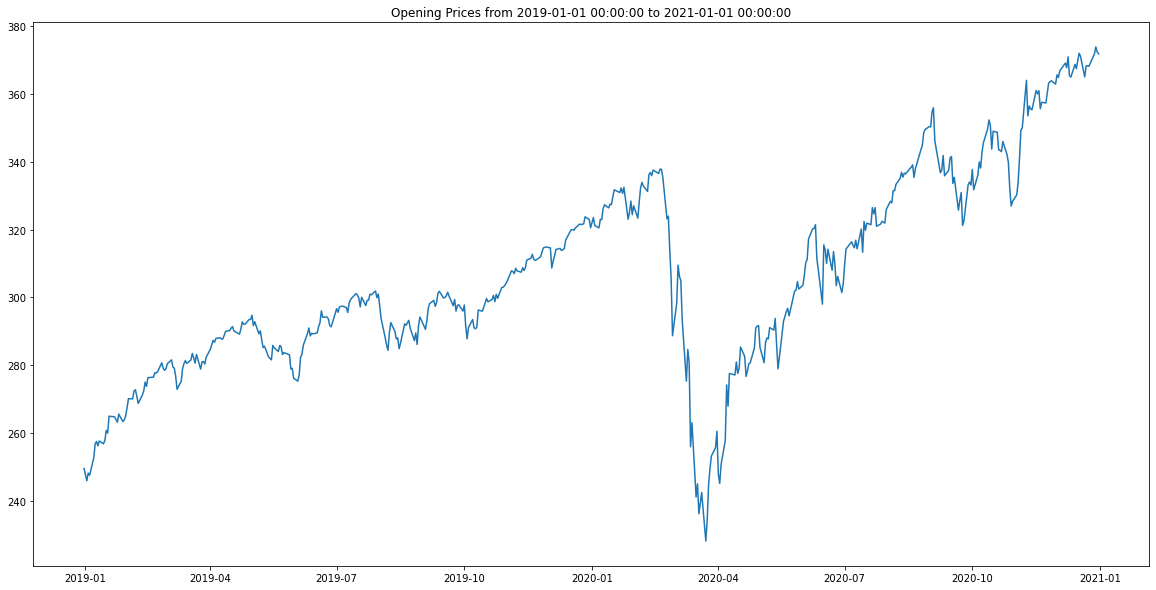

In [35]:
# import modules
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
  
# initialize parameters
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 1, 1)
  
# get the data
data = yf.download('SPY', start = start_date,
                   end = end_date)
  
# display
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(data['Open'])
plt.show()

In [36]:

# import modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
  
# initializing Parameters
start = "2020-01-01"
end = "2021-01-01"
symbols = ["AAPL"]
  
# Getting the data
data = pdr.get_data_yahoo(symbols, start, end)
  
# Display
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start, end))
plt.plot(data['Open'])
plt.show()

ModuleNotFoundError: No module named 'pandas_datareader'

KeyError: 'Open'

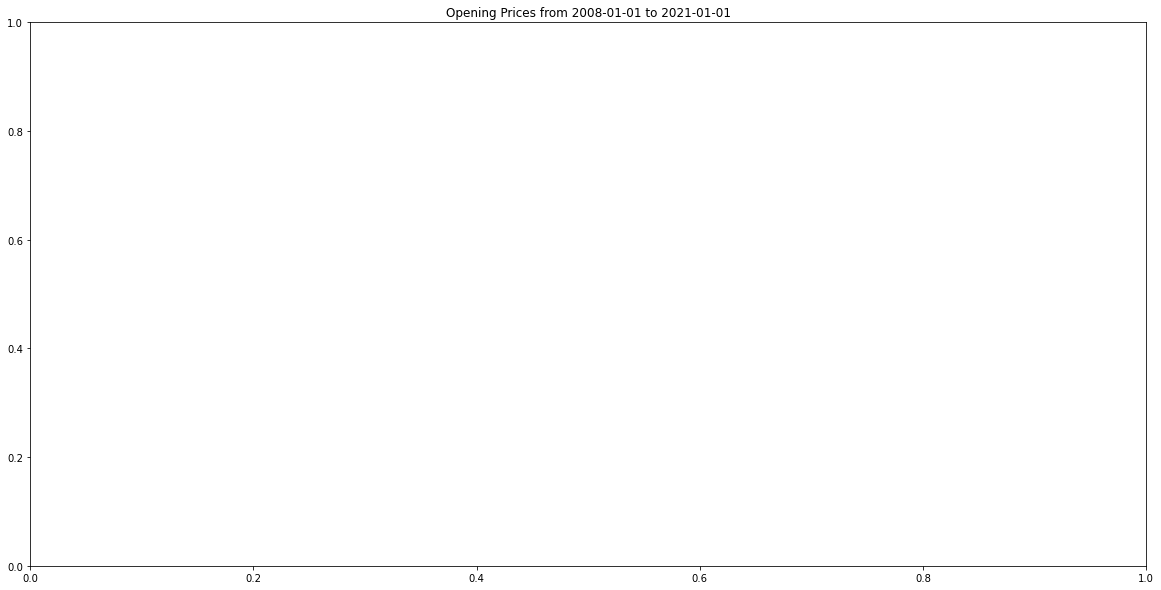

In [52]:
import pandas_datareader as web

start = "2008-01-01"
end = "2021-01-01"
data = web.DataReader("TSM", 'tiingo', start, end, api_key='')

# Display
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start, end))
plt.plot(data['Open'])
plt.show()


In [67]:
import os
import pandas_datareader as pdr

key = ''

df = pdr.get_data_tiingo('MSFT', start='2019-01-01', end='2020-05-30', api_key=key)['adjClose']

In [64]:
import yfinance as yf
df = yf.download('MSFT', start='2019-01-01', end='2020-05-30')['Adj Close']

[*********************100%***********************]  1 of 1 completed


TypeError: 'value' must be an instance of str or bytes, not a tuple

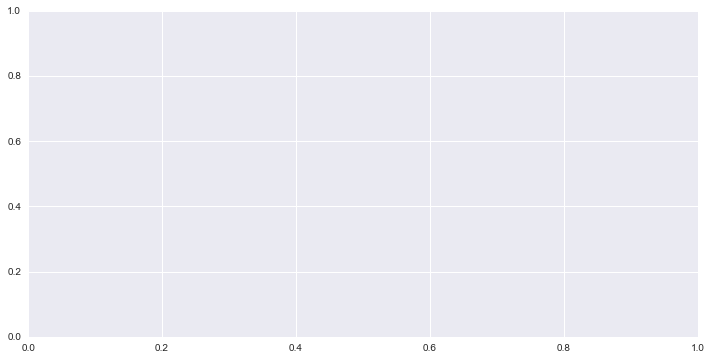

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Register the converters
pd.plotting.register_matplotlib_converters()

# Set the style to seaborn for plotting
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the cumulative returns fot each symbol
ax.plot(df)
ax.legend()
plt.title('Adjusted Close Price - MSFT', fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()
plt.close()
